In [210]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt


In [211]:
df_og = pd.read_csv('Amazon_new_data.csv')
df_og.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN


# **Cleaning the Data**

> Removing the bad data which affects our Model

In [212]:
df=df_og

**After 13th Columns rest of the column are irrelevent**

In [213]:
df = df.iloc[:,:14]

In [214]:
df.isnull().sum()

uniq_id                                           2
product_name                                      2
manufacturer                                      9
price                                          1437
number_available_in_stock                      2502
number_of_reviews                                20
number_of_answered_questions                    767
average_review_rating                            20
amazon_category_and_sub_category                692
description                                     653
product_information                              61
product_description                             654
items_customers_buy_after_viewing_this_item    3068
customer_questions_and_answers                 9089
dtype: int64

In [215]:
df=df.drop('customer_questions_and_answers',axis=1)

In [216]:
df_null = df[['price','number_available_in_stock']].isna()
df_null.sum()

price                        1437
number_available_in_stock    2502
dtype: int64

In [217]:
#Lets Drop those rows where price is NULL and Drop the columns which are not required

In [218]:
df.dropna(subset=['price'],axis=0,inplace=True)
df.drop(['uniq_id'],axis=1,inplace=True)

In [219]:
df['number_available_in_stock'].count()

6338

In [220]:
df['number_available_in_stock'].fillna(value='0 new',inplace=True)

In [221]:
df.head()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,0 new,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,0 new,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,0 new,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...


In [222]:
# Lets convert the 'price' and 'number_available_in_stock' in float and integer types

In [223]:
df['Price(In £)'] = df['price'].str[1:]

#df['Price(In £)'].astype(np.float64)


**The Data Which needs to be removed**

In [224]:
df[df['manufacturer'].isnull()].count()['manufacturer']

0

In [225]:
# Removing the data where manufacturer is null so that we get products only from trusted sources
df = df.dropna(subset=['amazon_category_and_sub_category'])

In [226]:
def Extra(str):
    if ',' in str:
        return True
    else:
      return False

df[df['Price(In £)'].apply(Extra)]


,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £)
7098,Bowen Designs - Marvel Statue Thor Classic Act...,Bowen Designs,"£2,439.92",2 new,1.0,1.0,4.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Access...,Sideshow Collectibles is proud to present the ...,Technical Details Item Weight6 Kg Product Dime...,Sideshow Collectibles is proud to present the ...,NaN,"2,439.92"


In [227]:
df[df['Price(In £)'].str.contains('[A-Za-z]')]

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £)
2003,"{""""text"""":""""Digital & Prime Music""""","panelKey"""":""""Mp3Panel""""}","{""""subtext"""":""""A great selection of apps and g...","text"""":""""Appstore for Android""""","subtextKey"""":""""android-tagline""""","panelKey"""":""""AndroidPanel""""}","{""""text"""":""""Amazon Cloud Drive""""","panelKey"""":""""CloudDrivePanel""""}","panelKey"""":""""KindleReaderPanel""""}","{""""text"""":""""Fire Tablets""""","panelKey"""":""""KindleFireTabletPanel""""}","{""""text"""":""""Fire TV""""","""""subtext"""":""""A great selection of apps and ga..."
2005,"{""""text"""":""""Digital & Prime Music""""","panelKey"""":""""Mp3Panel""""}","{""""subtext"""":""""A great selection of apps and g...","text"""":""""Appstore for Android""""","subtextKey"""":""""android-tagline""""","panelKey"""":""""AndroidPanel""""}","{""""text"""":""""Amazon Cloud Drive""""","panelKey"""":""""CloudDrivePanel""""}","panelKey"""":""""KindleReaderPanel""""}","{""""text"""":""""Fire Tablets""""","panelKey"""":""""KindleFireTabletPanel""""}","{""""text"""":""""Fire TV""""","""""subtext"""":""""A great selection of apps and ga..."


In [228]:
df_new=df

In [229]:
df_new = df_new.drop(index=[7098,2003, 2005])

#**Feature Engineering**

> Splitting the and storing the Data we want from a column

> Changing the Datatype Accordingly





In [230]:
def Extra(str):
    if '-' in str:
        return True
    else:
      return False

df_new[df_new['Price(In £)'].apply(Extra)].count()['Price(In £)']


16

In [231]:
name = '£269.00 - £699.99'
name.split(' - ')[1][1:]

'699.99'

In [232]:
# We cannot drop the Range data as is useful Information
# So we Are taking Average of the Range to get an estimate value

def Extra_hypen(str):
    if '-' in str:
        return True
    else:
      return False
def Extra_comma(str):
    if ',' in str:
        return str.replace(',', '')
    else:
      return str

def extract_prices(value):
    if(Extra_hypen(value)):
      prices = value.split(' - ')
      min_price = prices[0]
      max_price = prices[1]
      return ((float(min_price[0:])+float(max_price[1:]))/2)

    elif ',' in value:
      return value.replace(',', '')

    else:
      return value



In [233]:
df_new['Price(In £)'] = df_new['Price(In £)'].apply(lambda x: extract_prices(x))

In [234]:
df_new = df_new.drop(columns=['price'])
df_new.head()

,product_name,manufacturer,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £)
0,Hornby 2014 Catalogue,Hornby,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,3.42
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,0 new,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,16.99
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,9.99
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,0 new,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,39.99
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,0 new,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,32.19


In [235]:
df_new['Price(In £)'] = df_new['Price(In £)'].astype(float)

**As we can see there are quite a few values of this range type which can't be converted to string
So lets find the average values of the range type and store it in the new Column**

In [236]:
df_new['Price(In £)']
df=df_new

**In this coloumn some of the values are in the form of n out of 5 and some are not**

In [237]:
def num(value):
    if isinstance(value, str):
        parts = value.split()
        if (len(parts) > 1):
            return parts[0]
        else:
           return value
    else:
        return value

df['Rating(Out of 5)'] = df['average_review_rating'].apply(lambda x: num(x))


In [238]:
df = df.drop('average_review_rating',axis=1)

In [239]:
df['Rating(Out of 5)']= df['Rating(Out of 5)'].astype(float)

In [240]:
df['Stock Availible']=df['number_available_in_stock'].apply(lambda x: x.split()[0])

In [241]:
df = df.drop('number_available_in_stock',axis=1)

In [242]:
def replace(value):
  if(isinstance(value,str)):
    if (',' in value):
      return value.replace(',', '')
    else :
      return value
  else :
      return value

df['number_of_reviews']=df['number_of_reviews'].apply(lambda x: replace(x))

In [243]:
df['Stock Availible']=df['Stock Availible'].astype(int)
df['number_of_reviews']=df['number_of_reviews'].astype(float)

In [244]:
df.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £),Rating(Out of 5),Stock Availible
0,Hornby 2014 Catalogue,Hornby,15.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,3.42,4.9,5
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,16.99,4.5,0
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,9.99,3.9,2
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,39.99,5.0,0
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,32.19,4.7,0


**So it means Oxford Diecast is manufacturer of most of the products and There are too many unique values so grouping them would not be a great Idea**

<Axes: >

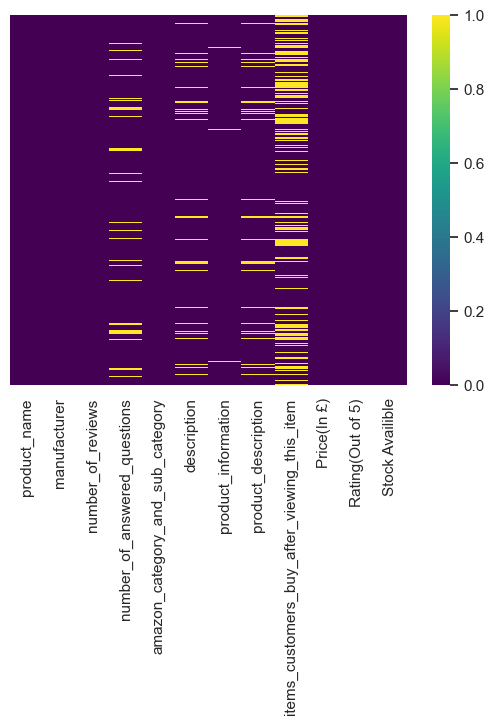

In [245]:
sn.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [246]:
def fl(value):
  if isinstance(value,float):
    return value
  else:
    return value.split(' > ')[0]

In [247]:
df['Category'] = df['amazon_category_and_sub_category'].apply(lambda x : fl(x))

In [248]:
df.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,Price(In £),Rating(Out of 5),Stock Availible,Category
0,Hornby 2014 Catalogue,Hornby,15.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,3.42,4.9,5,Hobbies
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2.0,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,16.99,4.5,0,Hobbies
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,9.99,3.9,2,Hobbies
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,39.99,5.0,0,Hobbies
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3.0,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,32.19,4.7,0,Hobbies


#Data Visualization(Understanding Important Insights)


> 1.) **Find the Average Rating of Each Category and if they are trustable**

> 2.) **Find Average Price of Each Category on Amazon**

> 3.) **Find Stocks Availible in Each Category**

> 4.)**Find Top 10 Categories with subcategories which genereted the Highest     Revenue**

> 5.)**Top 10 Manufacturer in terms of Quantity of Item Sold**

> 6.) **How Much traffic are we getting from the Online Advertisements in terms of Revenue**

> 7.) **Show distribution of Price in Each Category**






**Number of Reviews is important so that we can understand if we can trust the ratings or not**

In [249]:
fig = px.bar(df.groupby('Category')['number_of_reviews'].sum().reset_index(),
             x='Category', y='number_of_reviews',
             title='1.) Number of Reviews in each Category',
             color_discrete_sequence= px.colors.sequential.Plasma,)
fig.update_xaxes(tickangle=90)



In [250]:
fig1 = px.bar(df.groupby('Category')['Rating(Out of 5)'].mean().reset_index(),
             x='Category', y='Rating(Out of 5)',
             title='Average Rating of Each Category in Amazon',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig1.update_xaxes(tickangle=90)

In [251]:
fig = px.bar(df.groupby('Category')['Price(In £)'].mean().reset_index(),
             x='Category', y='Price(In £)',
             title='2.) Average Price of Each Category in Amazon')

fig.update_xaxes(tickangle=90)

**Find : Availiblity of Stocks in Each Category**

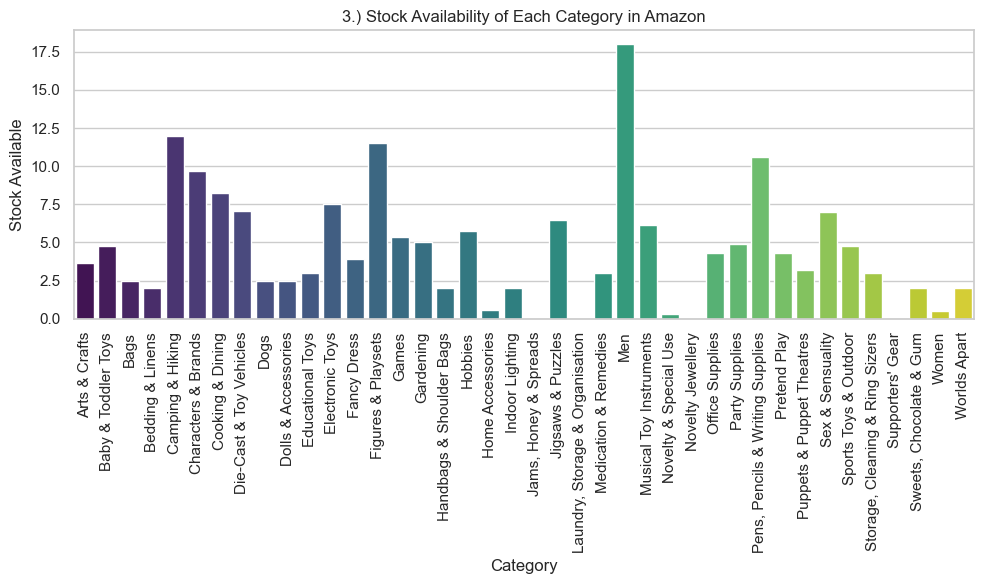

In [252]:
category_mean = df.groupby('Category')['Stock Availible'].mean().reset_index()

# Set the style of the plot
sn.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sn.barplot(x='Category', y='Stock Availible', data=category_mean,
            palette="viridis")  # Set the color palette

# Set the title and labels
plt.title('3.) Stock Availability of Each Category in Amazon')
plt.xlabel('Category')
plt.ylabel('Stock Available')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [253]:
top_10 = df.groupby('amazon_category_and_sub_category')['Price(In £)'].sum().reset_index().nlargest(10, 'Price(In £)')

# Create a bar plot using Plotly Express
fig = px.bar(top_10, x='Price(In £)', y='amazon_category_and_sub_category',
             title='4.) Top 10 Categories which generated the highest Revenue',
             color='Price(In £)')  # Set the color based on the Price column
fig.update_xaxes(tickangle=90)
fig.show()

In [254]:
top10 = df['manufacturer'].value_counts().head(10)

fig = px.bar(x=top10.values, y=top10.index, title='5.) Top 10 Manufacturer in Terms of Quantity Sold',
             labels={'x': 'Quantity Sold', 'y': 'Manufacturer'})
fig.show()

# You can also see Top 10 Manufacturer in terms of Reveneue generated

In [255]:
top_10 = df.groupby('items_customers_buy_after_viewing_this_item')['Price(In £)'].sum().reset_index().nlargest(20,'Price(In £)')

# Create a bar plot using Plotly Express
fig = px.bar(top_10, x='items_customers_buy_after_viewing_this_item', y='Price(In £)',
             title='6.) Revenue generated by top 20 products after being viewed',
             color_discrete_sequence= px.colors.sequential.Plasma)
fig.update_xaxes(tickangle=90)
fig.show()

# You can also see this in terms of Quantity

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hobbies'),
  Text(1, 0, 'Characters & Brands'),
  Text(2, 0, 'Fancy Dress'),
  Text(3, 0, 'Arts & Crafts'),
  Text(4, 0, 'Games'),
  Text(5, 0, 'Figures & Playsets'),
  Text(6, 0, 'Die-Cast & Toy Vehicles'),
  Text(7, 0, 'Sports Toys & Outdoor'),
  Text(8, 0, 'Dolls & Accessories'),
  Text(9, 0, 'Puppets & Puppet Theatres')])

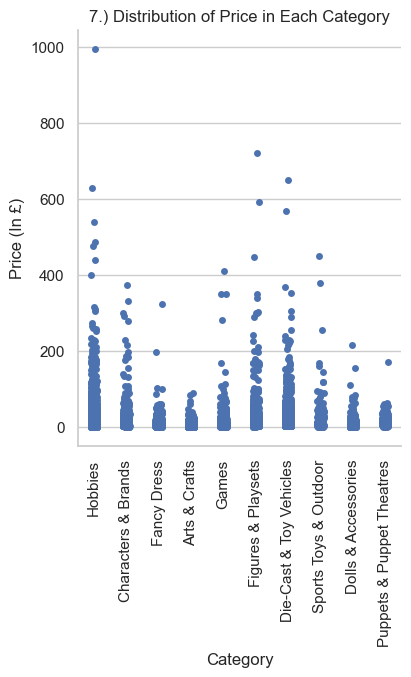

In [256]:
top10 = df.groupby('Category')['Price(In £)'].sum().nlargest(10).index


df_top10 = df[df['Category'].isin(top10)]

sn.catplot(x='Category', y='Price(In £)', data=df_top10)
plt.title('7.) Distribution of Price in Each Category')
plt.xlabel('Category')
plt.ylabel('Price (In £)')
plt.xticks(rotation=90)